<a href="https://colab.research.google.com/github/emon273273/Thesis/blob/Main/ml/Diabetics_data_prediction_using_linear_logistic_knn_and_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('/content/drive/MyDrive/versity/Thesis/data/diabetes.csv')

In [6]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#display dataset randomly
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
713,0,134,58,20,291,26.4,0.352,21,0
207,5,162,104,0,0,37.7,0.151,52,1
576,6,108,44,20,130,24.0,0.813,35,0
61,8,133,72,0,0,32.9,0.270,39,1
326,1,122,64,32,156,35.1,0.692,30,1
116,5,124,74,0,0,34.0,0.220,38,1
693,7,129,68,49,125,38.5,0.439,43,1
80,3,113,44,13,0,22.4,0.140,22,0
666,4,145,82,18,0,32.5,0.235,70,1
79,2,112,66,22,0,25.0,0.307,24,0


In [9]:
#shape of the dataset
df.shape

(768, 9)

In [10]:
#dataset type info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
#statistical summery
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



# Data cleaning

In [12]:
#check the shape befor drop the duplicates
df.shape

(768, 9)

In [13]:
df=df.drop_duplicates()

In [14]:
#check now
df.shape

(768, 9)

In [15]:
#check null value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
#check if any column have contain 0 value or not
print("no of zero values in Pregnancies",df[df['Pregnancies']==0].shape[0])
print("no of zero values in Glucose",df[df['Glucose']==0].shape[0])
print("no of zero values in BloodPressure",df[df['BloodPressure']==0].shape[0])
print("no of zero values in SkinThickness",df[df['SkinThickness']==0].shape[0])
print("no of zero values in Insulin",df[df['Insulin']==0].shape[0])
print("no of zero values in BMI",df[df['BMI']==0].shape[0])
print("no of zero values in Age",df[df['Age']==0].shape[0])


no of zero values in Pregnancies 111
no of zero values in Glucose 5
no of zero values in BloodPressure 35
no of zero values in SkinThickness 227
no of zero values in Insulin 374
no of zero values in BMI 11
no of zero values in Age 0


In [18]:
df['Pregnancies']=df['Pregnancies'].replace(0,df['Pregnancies'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['Age']=df['Age'].replace(0,df['Age'].mean())


In [19]:
#check if any column have contain 0 value or not
print("no of zero values in Pregnancies",df[df['Pregnancies']==0].shape[0])
print("no of zero values in Glucose",df[df['Glucose']==0].shape[0])
print("no of zero values in BloodPressure",df[df['BloodPressure']==0].shape[0])
print("no of zero values in SkinThickness",df[df['SkinThickness']==0].shape[0])
print("no of zero values in Insulin",df[df['Insulin']==0].shape[0])
print("no of zero values in BMI",df[df['BMI']==0].shape[0])
print("no of zero values in Age",df[df['Age']==0].shape[0])


no of zero values in Pregnancies 0
no of zero values in Glucose 0
no of zero values in BloodPressure 0
no of zero values in SkinThickness 0
no of zero values in Insulin 0
no of zero values in BMI 0
no of zero values in Age 0


In [20]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1.000000,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8.000000,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1.000000,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,3.845052,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5.000000,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3.000000,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10.000000,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2.000000,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8.000000,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


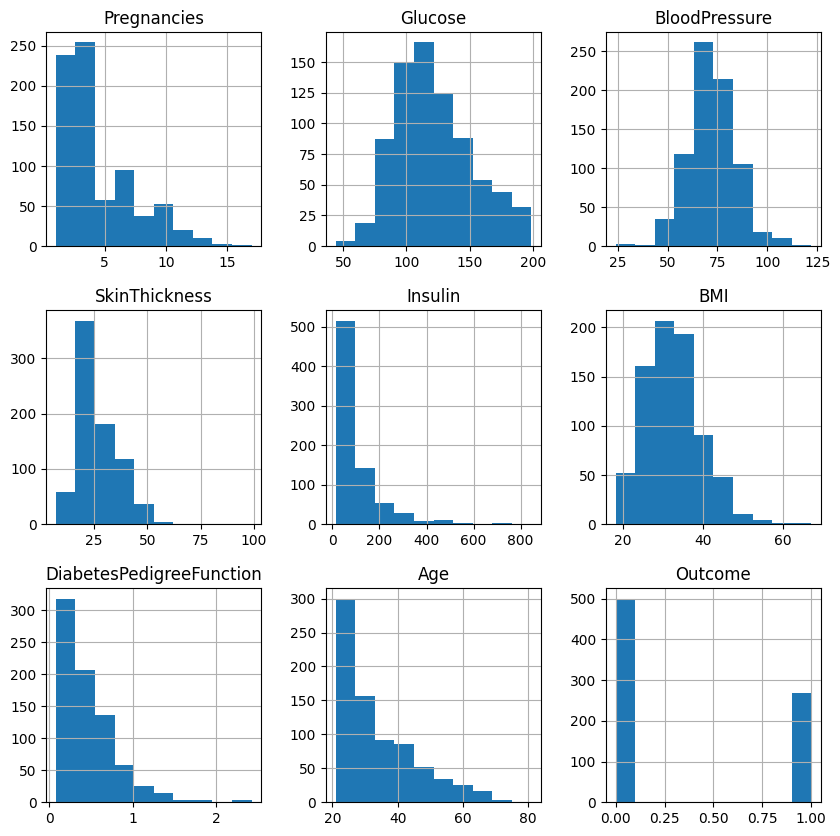

In [21]:
#histrogram
df.hist(bins=10,figsize=(10,10))
plt.show()

# Split the data frame into X and y

In [22]:
target_name='Outcome'
y=df['Outcome']
X=df.drop(target_name,axis=1)




In [23]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [24]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33


# Feature scaling tecniques


In [25]:
#standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
SSX=scaler.transform(X)
SSX

array([[ 0.5362511 ,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-1.1403533 , -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.20689286,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.20093022, -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-1.1403533 ,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-1.1403533 , -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

# Train Test split


In [26]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(SSX,y,test_size=0.25,random_state=42)
X_train.shape,y_train.shape

((576, 8), (576,))

In [27]:
X_test.shape,y_test.shape

((192, 8), (192,))

# Build the classification algorithm

#Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
Linearregression=LinearRegression()
Linearregression.fit(X_train,y_train)

LinearRegression()

In [29]:
linear_predict=Linearregression.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':linear_predict}).round(0)
df

,Actual,Predicted
668,0,0.0
324,0,0.0
624,0,0.0
690,0,0.0
473,0,0.0
...,...,...
554,0,0.0
319,1,1.0
594,0,0.0
6,1,0.0


In [30]:
#check accuracy mean
from sklearn.metrics import mean_absolute_error
mae_for_linear=mean_absolute_error(y_test,linear_predict)
print(f"mean absolute error {mae_for_linear}")

mean absolute error 0.3465183318718143


In [31]:
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test , linear_predict)

# Logistic Regression


In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_predict=lr.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':lr_predict}).round(0)
df


,Actual,Predicted
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
554,0,0
319,1,1
594,0,0
6,1,0


In [33]:
from sklearn.metrics import mean_absolute_error
mae_for_log=mean_absolute_error(y_test,lr_predict)
print(f"mean absolute error {mae_for_log}")

mean absolute error 0.265625


# KNN Classification

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [35]:
range_k = range(1,15)
scores = {}
scores_list = []
for k in range_k:
  classifier=KNeighborsClassifier(n_neighbors=k)
  classifier.fit(X_train,y_train)
  knn_predict=classifier.predict(X_test)
  scores[k]=metrics.accuracy_score(y_test,knn_predict)
  scores_list.append(metrics.accuracy_score(y_test,knn_predict))

result=metrics.confusion_matrix(y_test,knn_predict)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test , knn_predict)
print("Classification Report:",)


Confusion Matrix:
[[106  17]
 [ 31  38]]
Classification Report:


**Now, we will be plotting the relationship between the values of K and the corresponding testing
accuracy. It will be done using matplotlib library.**

Text(0, 0.5, 'Accuracy')

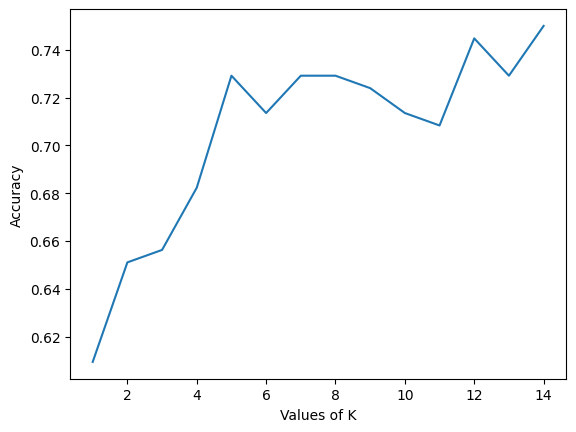

In [36]:
plt.plot(range_k,scores_list)
plt.xlabel("Values of K")
plt.ylabel("Accuracy")

In [37]:
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=2)

In [38]:
knn_predict=classifier.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':knn_predict}).round(0)
df


,Actual,Predicted
668,0,0
324,0,0
624,0,0
690,0,0
473,0,1
...,...,...
554,0,0
319,1,0
594,0,0
6,1,0


In [39]:
from sklearn.metrics import mean_absolute_error
knn_predict_mean=mean_absolute_error(y_test,knn_predict)
print(f"mean absolute error{knn_predict_mean}")

mean absolute error0.3489583333333333


# Naive bayes
Choose Naive Bayes Model: Choose the appropriate Naive Bayes model based on your problem type:
For binary or multiclass classification problems, you can use **GaussianNB (for continuous features), MultinomialNB (for discrete features), or BernoulliNB (for binary features).**

For the task of predicting whether a person has diabetes or not based on multiple features, you should use the Gaussian Naive Bayes (GaussianNB) classifier.

**Gaussian Naive Bayes is suitable for classification tasks where the features are continuous or real-valued. Since your dataset likely contains numerical features (e.g., blood glucose level, blood pressure, etc.), GaussianNB is a better choice.**

**Multinomial Naive Bayes (MultinomialNB) is typically used for text classification tasks where features represent the frequency of occurrences of words or tokens. It assumes that features follow a multinomial distribution.**


**Bernoulli Naive Bayes (BernoulliNB) is suitable for binary feature vectors. It assumes that features are binary-valued, such as presence or absence of certain features. While it can be used for binary data, it may not be the best choice if your dataset contains continuous or real-valued features.**

Here's how you can use Gaussian Naive Bayes for your diabetes prediction task:

python


In [41]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)


GaussianNB()

In [43]:
nb_predict=nb.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':nb_predict}).round(0)
df

,Actual,Predicted
668,0,0
324,0,0
624,0,0
690,0,0
473,0,1
...,...,...
554,0,0
319,1,1
594,0,1
6,1,0


In [44]:
from sklearn.metrics import mean_absolute_error
nb_predict_mean=mean_absolute_error(y_test,nb_predict)
print(f"mean absolute error{nb_predict_mean}")

mean absolute error0.265625
